In [1]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [2]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0300 - accuracy: 0.9918


0.9918000102043152

In [3]:
from keras import layers
from keras import models
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu',
                                    input_shape=(28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
import os
os.name

'nt'

In [5]:
import os, shutil
original_dataset_dir = r'D:\Users\Tuck\Documents\Работа\Python\ML_DATA\dogs-vs-cats'
base_dir = r'D:\Users\Tuck\Documents\Работа\Python\ML_DATA\dogs-vs-cats\cats_and_dogs_small'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train') 
os.mkdir(train_dir) 
validation_dir = os.path.join(base_dir, 'validation') 
os.mkdir(validation_dir) 
test_dir = os.path.join(base_dir, 'test') 
os.mkdir(test_dir) 
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir) 
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir) 
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir) 
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir) 
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir) 
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname) 
    shutil.copyfile(src, dst) 
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames: 
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname) 
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames: 
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(test_cats_dir, fname) 
    shutil.copyfile(src, dst) 
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst) 
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst) 
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [7]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

In [8]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [1]:
# Подготовка данных
from keras.preprocessing.image import ImageDataGenerator

# train_dir=r'D:\Users\Tuck\Documents\Работа\Python\ML_DATA\с&d_test_val\train'
# validation_dir=r'D:\Users\Tuck\Documents\Работа\Python\ML_DATA\с&d_test_val\val'
train_dir=r'D:\Users\Tuck\Documents\Работа\Python\ML_DATA\dogs-vs-cats\cats_and_dogs_small\train'
validation_dir=r'D:\Users\Tuck\Documents\Работа\Python\ML_DATA\dogs-vs-cats\cats_and_dogs_small\validation'
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary') 
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 22s 223ms/step - loss: 0.6936 - acc: 0.5035 - val_loss: 0.6794 - val_acc: 0.5760
Epoch 2/30
100/100 [==============================] - 7s 68ms/step - loss: 0.6590 - acc: 0.6040 - val_loss: 0.6488 - val_acc: 0.6080
Epoch 3/30
100/100 [==============================] - 7s 68ms/step - loss: 0.6051 - acc: 0.6810 - val_loss: 0.6052 - val_acc: 0.6640
Epoch 4/30
100/100 [==============================] - 7s 67ms/step - loss: 0.5595 - acc: 0.7000 - val_loss: 0.5959 - val_acc: 0.6790
Epoch 5/30
100/100 [==============================] - 7s 68ms/step - loss: 0.5334 - acc: 0.7335 - val_loss: 0.5747 - val_acc: 0.6910
Epoch 6/30
100/100 [==============================] - 7s 67ms/step - loss: 0.5029 - acc: 0.7490 - val_loss: 0.5889 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 7s 68ms/step - loss: 0.4771 - acc: 0.7710 - val_loss: 0.5694 - val_acc

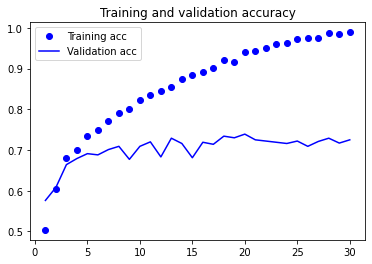

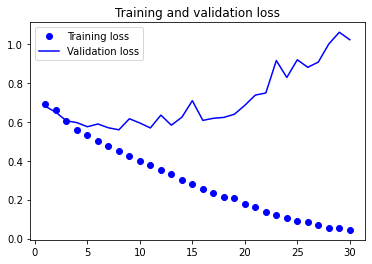

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [5]:
# Настройка расширения данных
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

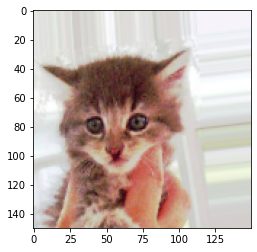

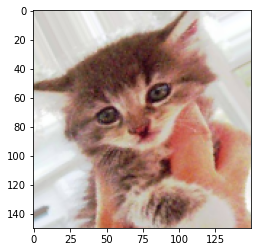

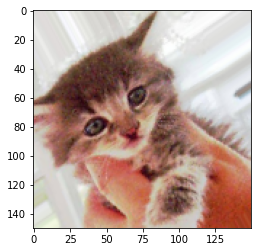

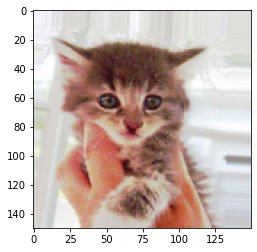

In [9]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt

train_cats_dir=r'D:\Users\Tuck\Documents\Работа\Python\ML_DATA\dogs-vs-cats\cats_and_dogs_small\train\cats'
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break 
plt.show()

In [24]:
del model, train_generator, validation_generator, history

In [1]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_dir=r'D:\Users\Tuck\Documents\Работа\Python\ML_DATA\dogs-vs-cats\cats_and_dogs_small\train'
validation_dir=r'D:\Users\Tuck\Documents\Работа\Python\ML_DATA\dogs-vs-cats\cats_and_dogs_small\validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 15s 147ms/step - loss: 0.6949 - acc: 0.5155 - val_loss: 0.6898 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 15s 146ms/step - loss: 0.6869 - acc: 0.5445 - val_loss: 0.6765 - val_acc: 0.5790
Epoch 3/100
100/100 [==============================] - 15s 146ms/step - loss: 0.6751 - acc: 0.5735 - val_loss: 0.6558 - val_acc: 0.6100
Epoch 4/100
100/100 [==============================] - 15s 146ms/step - loss: 0.6667 - acc: 0.5920 - val_loss: 0.6725 - val_acc: 0.5630
Epoch 5/100
100/100 [==============================] - 15s 146ms/step - loss: 0.6625 - acc: 0.5865 - val_loss: 0.6543 - val_acc: 0.5620
Epoch 6/100
100/100 [==============================] - 15s 147ms/step - loss: 0.6500 - acc: 0.6075 - val_loss: 0.6127 - val_acc: 0.6520
Epoch 7/100
100/100 [===

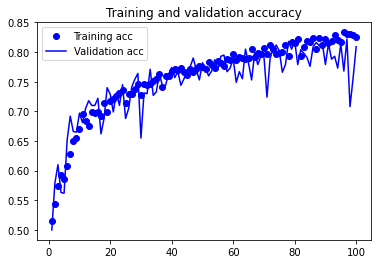

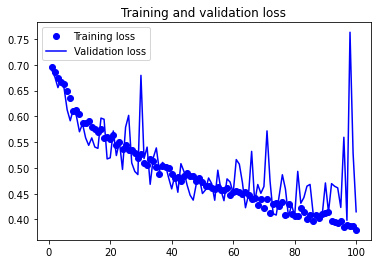

In [3]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [4]:
model.save('cats_and_dogs_small_2_batch_size20.h5')

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_dir=r'D:\Users\Tuck\Documents\Работа\Python\ML_DATA\dogs-vs-cats\cats_and_dogs_small\train'
validation_dir=r'D:\Users\Tuck\Documents\Работа\Python\ML_DATA\dogs-vs-cats\cats_and_dogs_small\validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit(
    train_generator,
    steps_per_epoch=2000/32, # total_traing_sample / batch_size
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
63/62 [==============================] - 15s 235ms/step - loss: 0.6975 - acc: 0.4895 - val_loss: 0.6885 - val_acc: 0.6010
Epoch 2/100
63/62 [==============================] - 12s 193ms/step - loss: 0.6914 - acc: 0.5245
Epoch 3/100
63/62 [==============================] - 12s 193ms/step - loss: 0.6826 - acc: 0.5670
Epoch 4/100
63/62 [==============================] - 12s 193ms/step - loss: 0.6760 - acc: 0.5745
Epoch 5/100
63/62 [==============================] - 12s 193ms/step - loss: 0.6628 - acc: 0.5920
Epoch 6/100
63/62 [==============================] - 12s 190ms/step - loss: 0.6547 - acc: 0.6120
Epoch 7/100
63/62 [==============================] - 12s 192ms/step - loss: 0.6449 - acc: 0.6020
Epoch 8/100
63/62 [==============================] - 12s 192ms/step - loss: 0.6321 - acc: 0.6250
Epoch 9/100
63/62 [==============================] - 12s 191ms/step - loss: 0.6212 - acc: 0.6400
Epoch 

In [5]:
batch_size

NameError: name 'batch_size' is not defined